In [1]:
#Q.1) importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load dataset using read_csv()

series = pd.read_csv(r'robberies.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
month
1966-01-01    41
1966-01-02    39
1966-01-03    50
1966-01-04    40
1966-01-05    43
Name: robberies, dtype: int64


In [4]:
# Peek at the Data
print(series.head(10))

month
1966-01-01    41
1966-01-02    39
1966-01-03    50
1966-01-04    40
1966-01-05    43
1966-01-06    38
1966-01-07    44
1966-01-08    35
1966-01-09    39
1966-01-10    35
Name: robberies, dtype: int64


In [5]:
# summarize the dimensions of a time series; number of observations
print(series.size)

108


In [6]:
# query a dataset using a date-time index
print(series['1966-01'])

month
1966-01-01    41
1966-01-02    39
1966-01-03    50
1966-01-04    40
1966-01-05    43
1966-01-06    38
1966-01-07    44
1966-01-08    35
1966-01-09    39
1966-01-10    35
1966-01-11    29
1966-01-12    49
Name: robberies, dtype: int64


In [7]:
series = pd.read_csv('robberies.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
dataframe = pd.DataFrame()
dataframe['month'] = [series.index[i].day for i in range(len(series))]
dataframe['robberies'] = [series.index[i].month for i in range(len(series))]
print(dataframe.head(5))

   month  robberies
0      1          1
1      2          1
2      3          1
3      4          1
4      5          1


In [8]:
# create a lag feature
temps = pd.DataFrame(series.values)
dataframe = pd.concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['X', 'y']
print(dataframe.head(5))

      X   y
0   NaN  41
1  41.0  39
2  39.0  50
3  50.0  40
4  40.0  43


In [9]:
# create lag features

temps = pd.DataFrame(series.values)
dataframe = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['X1', 'X2', 'X3', 'y']
print(dataframe.head(5))

     X1    X2    X3   y
0   NaN   NaN   NaN  41
1   NaN   NaN  41.0  39
2   NaN  41.0  39.0  50
3  41.0  39.0  50.0  40
4  39.0  50.0  40.0  43


In [10]:
# create a rolling mean feature

temps = pd.DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = pd.concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)  t+1
0          NaN   41
1          NaN   39
2         40.0   50
3         44.5   40
4         45.0   43


In [11]:
# create rolling statistics features

temps = pd.DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)

dataframe = pd.concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
#print(dataframe.head(5))
print(dataframe.head(10))

    min       mean   max  t+1
0   NaN        NaN   NaN   41
1   NaN        NaN   NaN   39
2   NaN        NaN   NaN   50
3   NaN        NaN   NaN   40
4  39.0  43.333333  50.0   43
5  39.0  43.000000  50.0   38
6  40.0  44.333333  50.0   44
7  38.0  40.333333  43.0   35
8  38.0  41.666667  44.0   39
9  35.0  39.000000  44.0   35


In [12]:
print(window)

Rolling [window=3,center=False,axis=0,method=single]


In [13]:
# create expanding window features

temps = pd.DataFrame(series.values)
window = temps.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0  41.0  41.000000  41.0  39.0
1  39.0  40.000000  41.0  50.0
2  39.0  43.333333  50.0  40.0
3  39.0  42.500000  50.0  43.0
4  39.0  42.600000  50.0  38.0


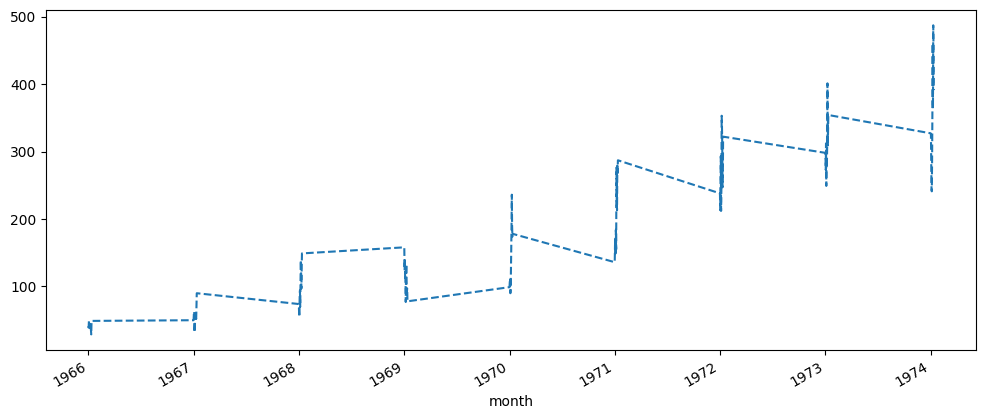

In [14]:
# create a line plot

series.plot(ls = '--', figsize = (12,5))
plt.show()

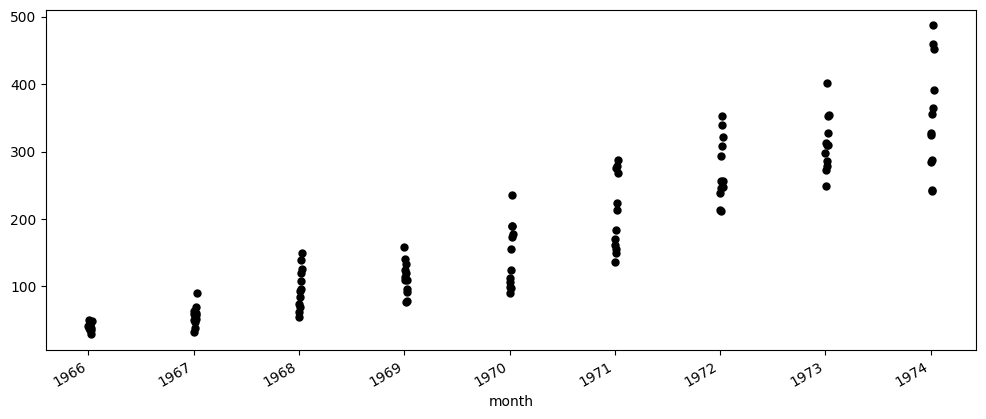

In [15]:
series.plot(style='k.', ms = 10, figsize = (12,5));

In [16]:
groups = series.groupby(pd.Grouper(freq='A'))

In [17]:
[(_.year,i.values,len(i.values)) for _,i in groups]

[(1966, array([41, 39, 50, 40, 43, 38, 44, 35, 39, 35, 29, 49]), 12),
 (1967, array([50, 59, 63, 32, 39, 47, 53, 60, 57, 52, 70, 90]), 12),
 (1968,
  array([ 74,  62,  55,  84,  94,  70, 108, 139, 120,  97, 126, 149]),
  12),
 (1969,
  array([158, 124, 140, 109, 114,  77, 120, 133, 110,  92,  97,  78]),
  12),
 (1970,
  array([ 99, 107, 112,  90,  98, 125, 155, 190, 236, 189, 174, 178]),
  12),
 (1971,
  array([136, 161, 171, 149, 184, 155, 276, 224, 213, 279, 268, 287]),
  12),
 (1972,
  array([238, 213, 257, 293, 212, 246, 353, 339, 308, 247, 257, 322]),
  12),
 (1973,
  array([298, 273, 312, 249, 286, 279, 309, 401, 309, 328, 353, 354]),
  12),
 (1974,
  array([327, 324, 285, 243, 241, 287, 355, 460, 364, 487, 452, 391]),
  12)]

In [18]:
series

month
1966-01-01     41
1966-01-02     39
1966-01-03     50
1966-01-04     40
1966-01-05     43
             ... 
1974-01-08    460
1974-01-09    364
1974-01-10    487
1974-01-11    452
1974-01-12    391
Name: robberies, Length: 108, dtype: int64

<Figure size 640x480 with 0 Axes>

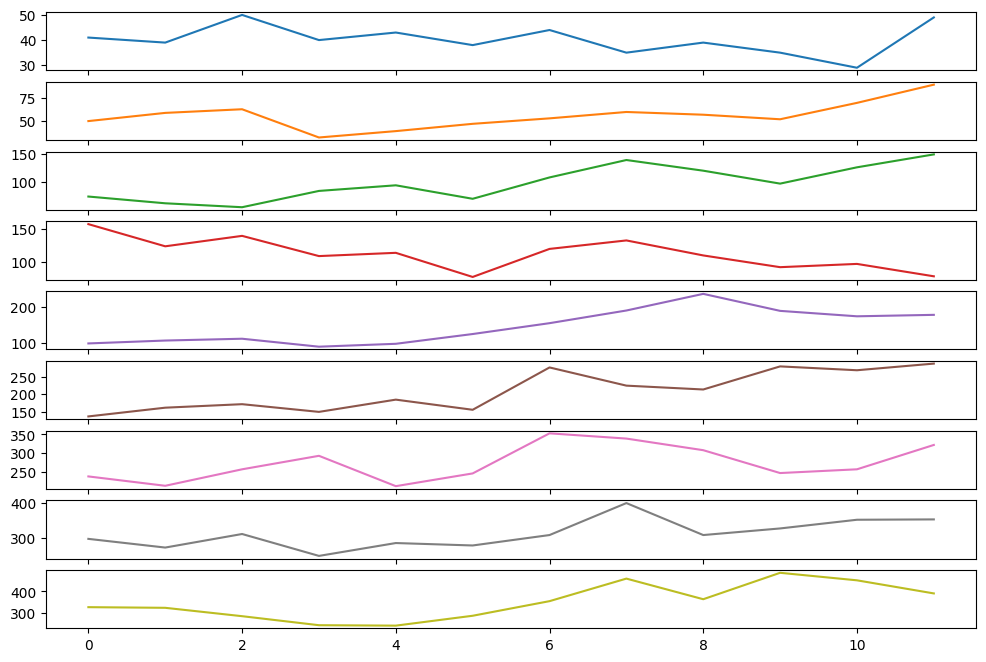

In [19]:
# create stacked line plots

groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
plt.subplots_adjust(hspace = 0.5)
years.plot(subplots=True, legend=False, figsize = (12,8))
plt.show()

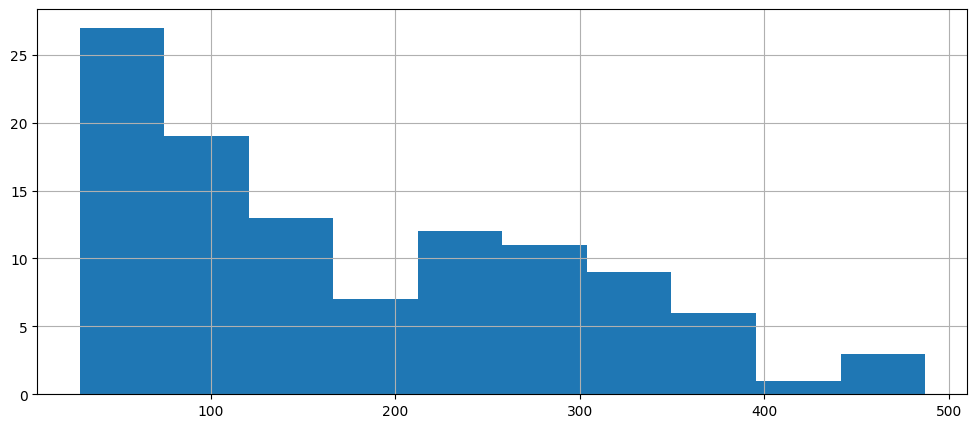

In [20]:
# create a histogram plot

series.hist(figsize = (12,5));

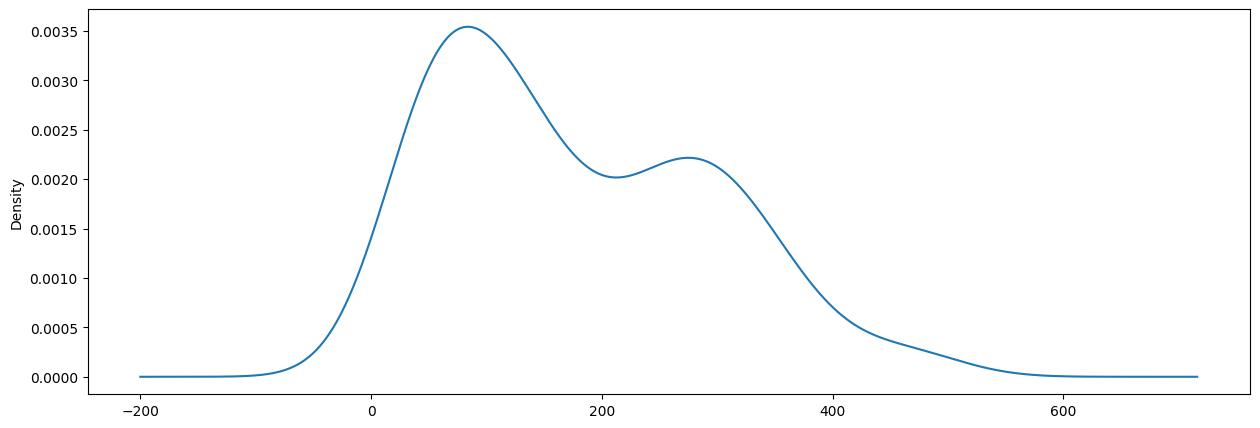

In [21]:
# create a density plot

series.plot(kind='kde', figsize = (15,5));

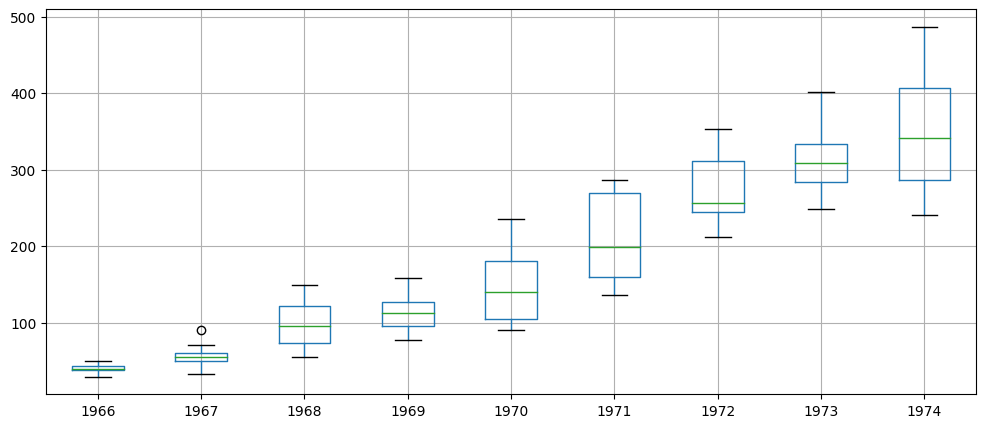

In [22]:
# create a boxplot of yearly data

groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot(figsize = (12,5))
plt.show()

<Figure size 1500x600 with 0 Axes>

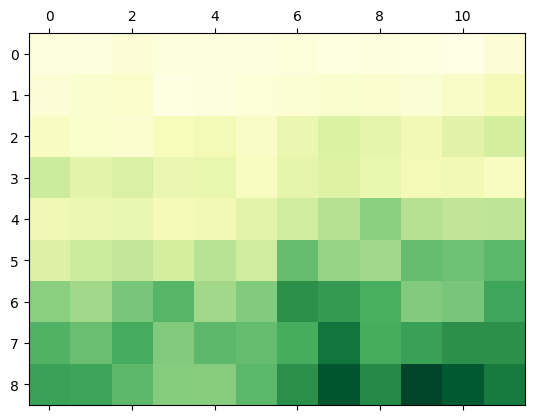

In [23]:
# create a heatmap of yearly data

groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
plt.figure(figsize = (15,6))
plt.matshow(years, interpolation = None, cmap = 'YlGn')
plt.show()

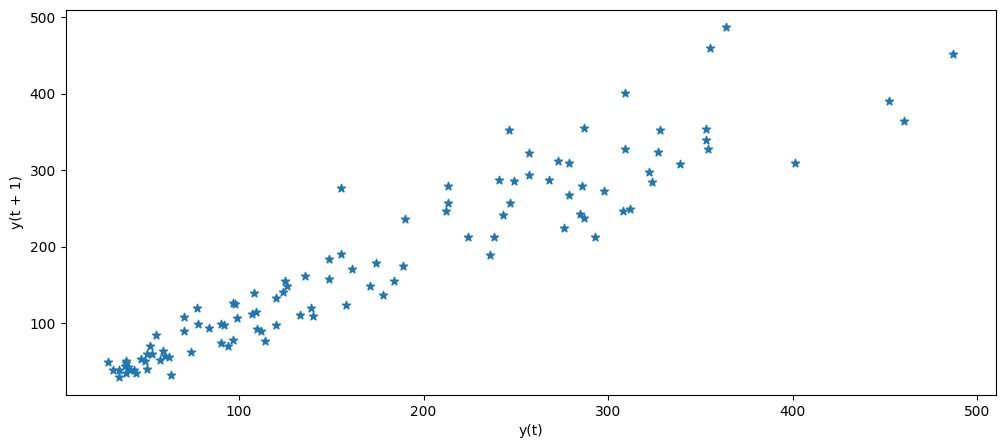

In [24]:
# create a Lag Scatter plot

from pandas.plotting import lag_plot
plt.figure(figsize = (12,5))
lag_plot(series, marker = '*')
plt.show()

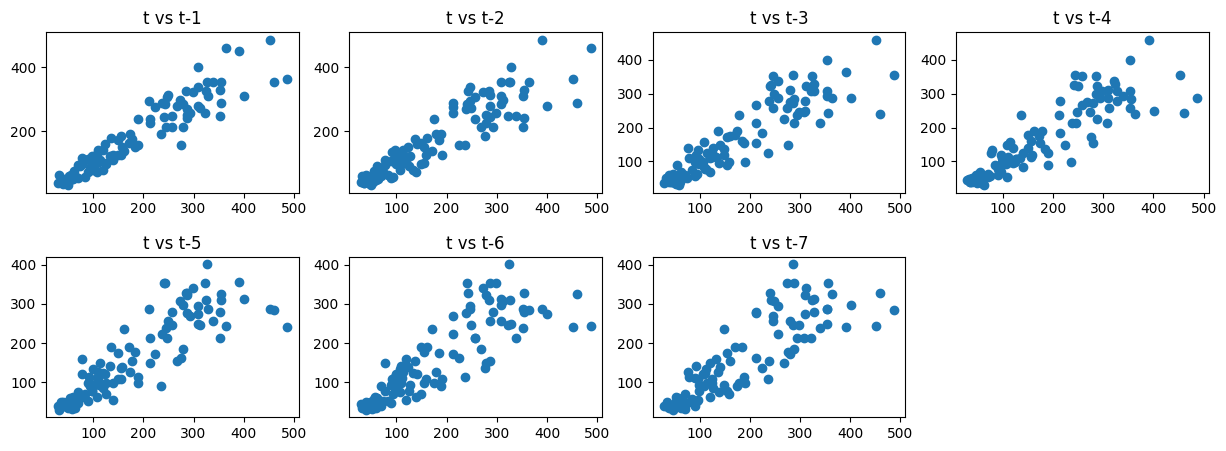

In [25]:
# create multiple scatter plots

values = pd.DataFrame(series.values)
lags = 7
columns = [values]
plt.figure(figsize = (15,5))
plt.subplots_adjust(hspace = 0.4)
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()

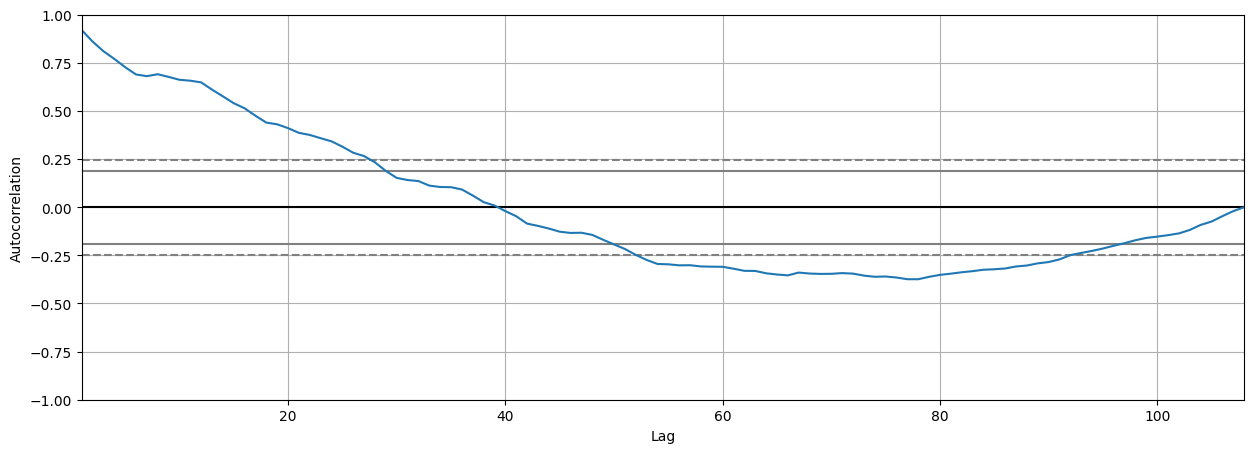

In [26]:
# create an autocorrelation plot
plt.figure(figsize = (15,5))
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

In [27]:
#Q.2)
#1.
# calculate forecast error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [-0.2, 0.09999999999999998, -0.1, -0.09999999999999998, -0.2]


In [28]:
# Calculating mean forecast error (forecast bias)
bias = sum(forecast_errors) * 1.0/len(expected)
print('Bias: %f' % bias)

Bias: -0.100000


In [29]:
# calculate mean absolute error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(expected,predictions)
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mape = mean_absolute_percentage_error(y_true,y_pred)
print('MAE: %f' % mae)
print('MAPE: %f' % mape)

MAE: 0.140000
MAPE: 0.327381


In [30]:
# calculate mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true,y_pred)
print('MSE: %f' % mse)

MSE: 0.375000


In [31]:
# calculate root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.612372


In [32]:
#2)
#2.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

series = pd.read_csv("robberies.csv")

# Step 1: Define the Supervised Learning Problem
# Create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
#dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

series.head()

# Step 2: # split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

            0     1           0   1
0        None  None  01-01-1966  41
1  01-01-1966    41  01-02-1966  39
2  01-02-1966    39  01-03-1966  50
3  01-03-1966    50  01-04-1966  40
4  01-04-1966    40  01-05-1966  43


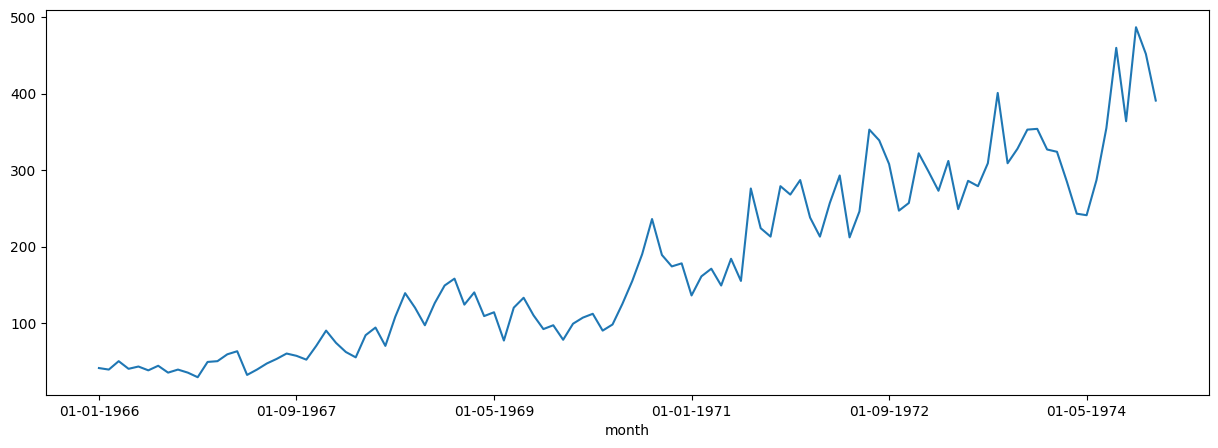

In [33]:
#Q.3)
import pandas as pd
import matplotlib.pyplot as plt


series = pd.read_csv('robberies.csv', header = 0, index_col = 0, squeeze = True)

series.head()

series.plot(figsize = (15,5));

In [34]:
# !pip install statsmodels

In [35]:
plt.figure(figsize = (15,5))
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order = (5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

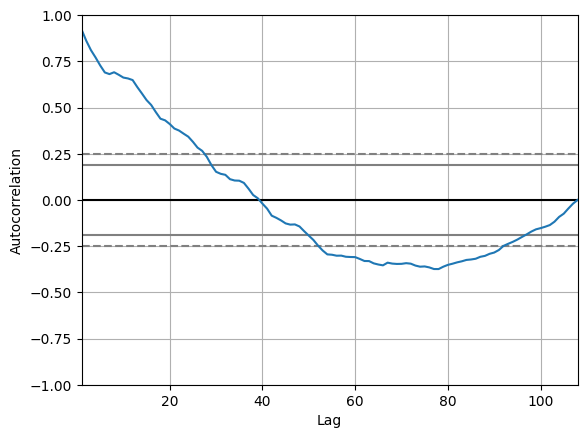

In [36]:
autocorrelation_plot(series)

In [37]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              robberies   No. Observations:                  108
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -537.670
Date:                Sun, 28 May 2023   AIC                           1087.340
Time:                        06:38:34   BIC                           1103.377
Sample:                             0   HQIC                          1093.841
                                - 108                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3123      0.101     -3.096      0.002      -0.510      -0.115
ar.L2         -0.2267      0.083     -2.743      0.006      -0.389      -0.065
ar.L3         -0.0311      0.100     -0.313      0.7

<Axes: ylabel='Density'>

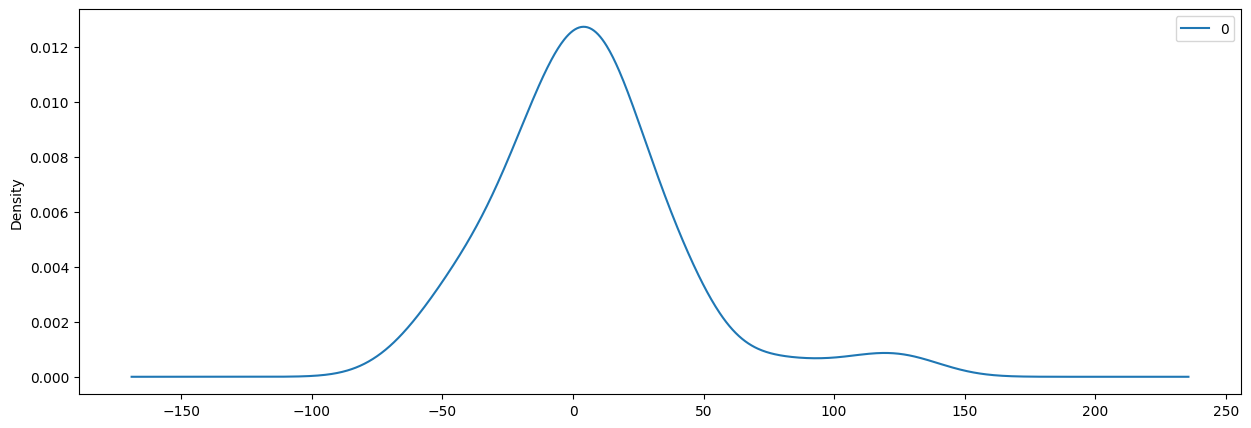

In [38]:
model_fit.resid

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind = 'kde', figsize = (15,5))

<Axes: xlabel='month'>

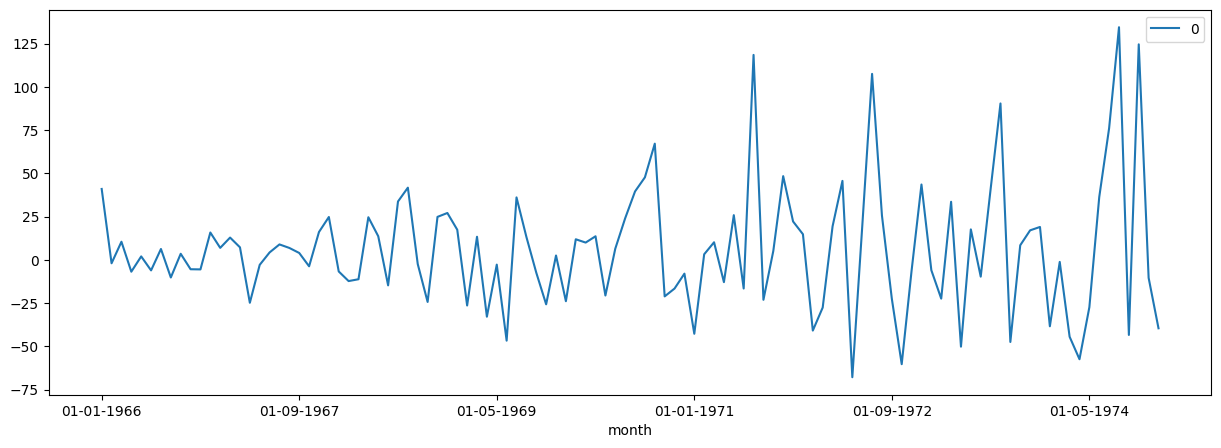

In [39]:
residuals.plot(figsize = (15,5))

In [40]:
# Step 3: persistence model
def model_persistence(x):
    return x

In [41]:
# Step 4: Make and Evaluate Forecast
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.612


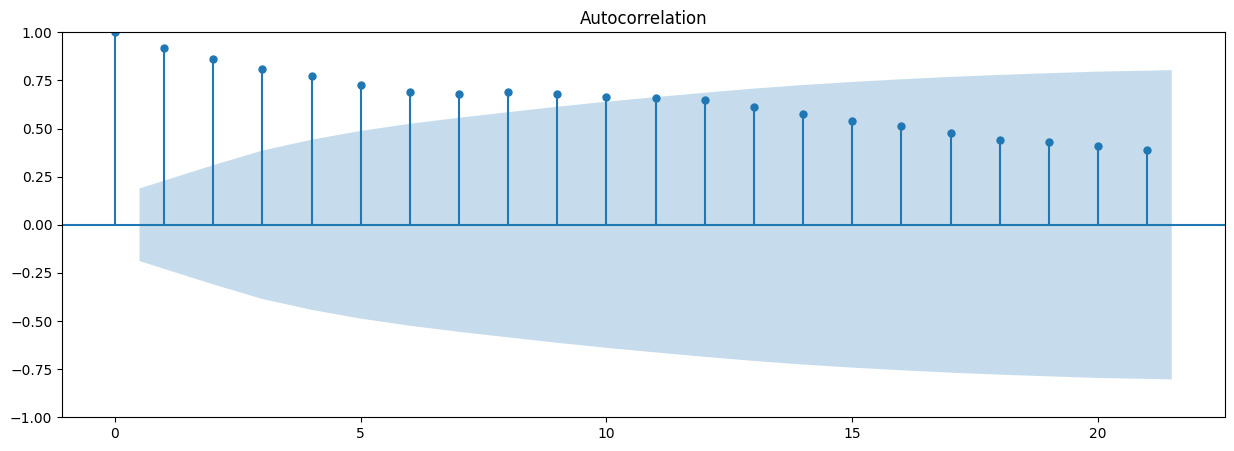

In [42]:
plt.rc("figure", figsize=(15,5))
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(series);

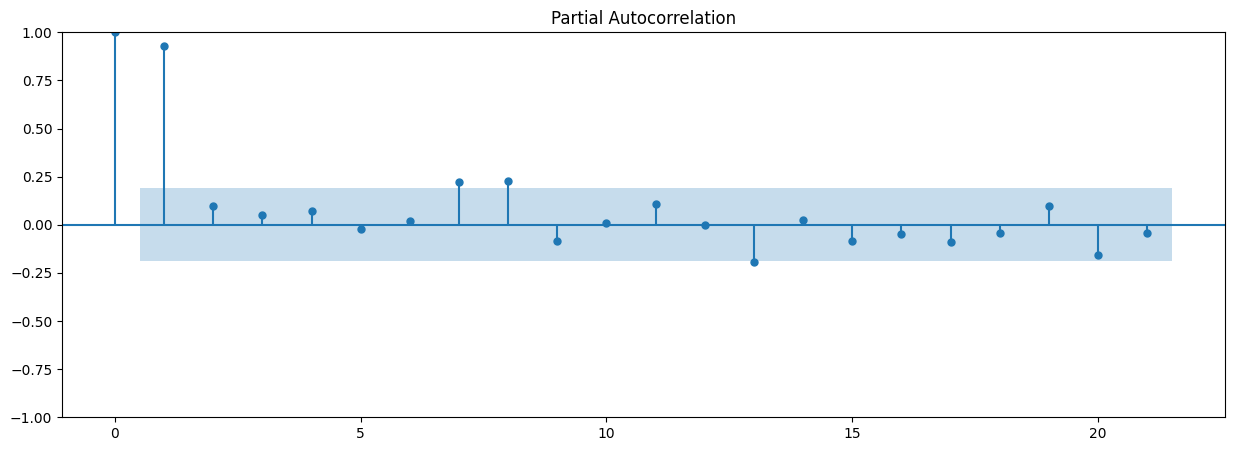

In [43]:
plot_pacf(series);

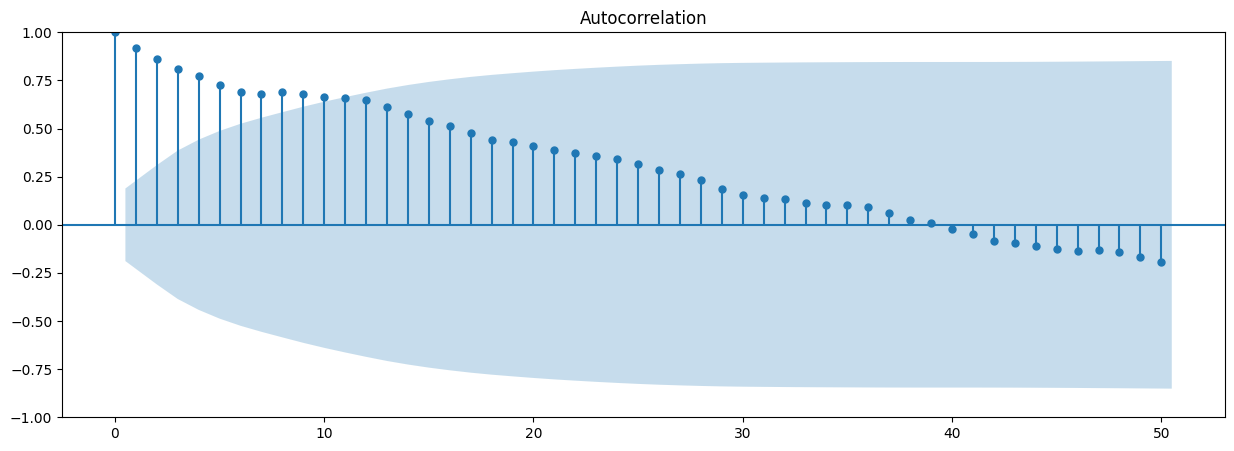

In [44]:
series = pd.read_csv('robberies.csv', header = 0, index_col = 0, squeeze = True)
plt.rc("figure", figsize=(15,5))
plot_acf(series,lags=50);

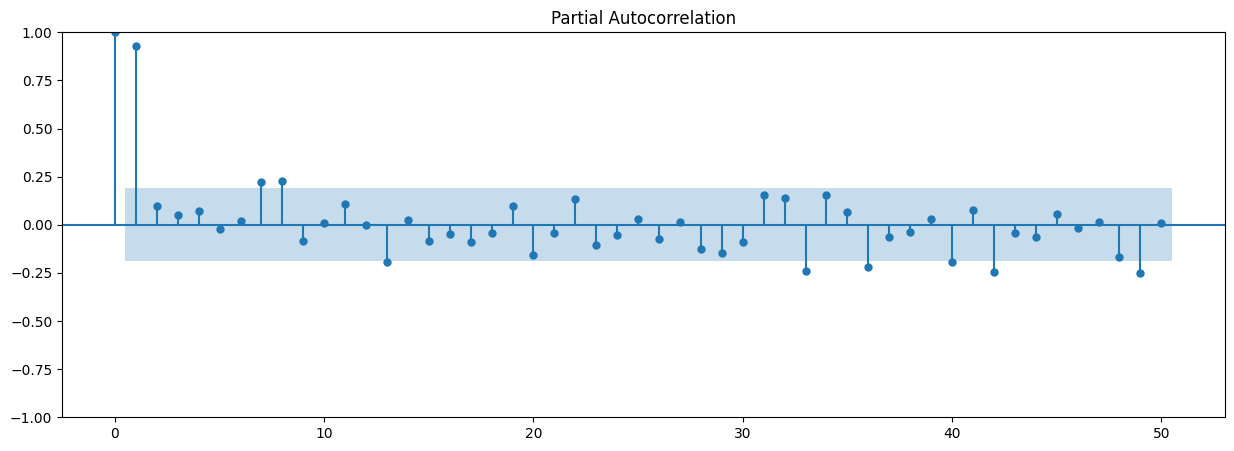

In [45]:
plt.rc("figure", figsize=(15,5))
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags = 50);

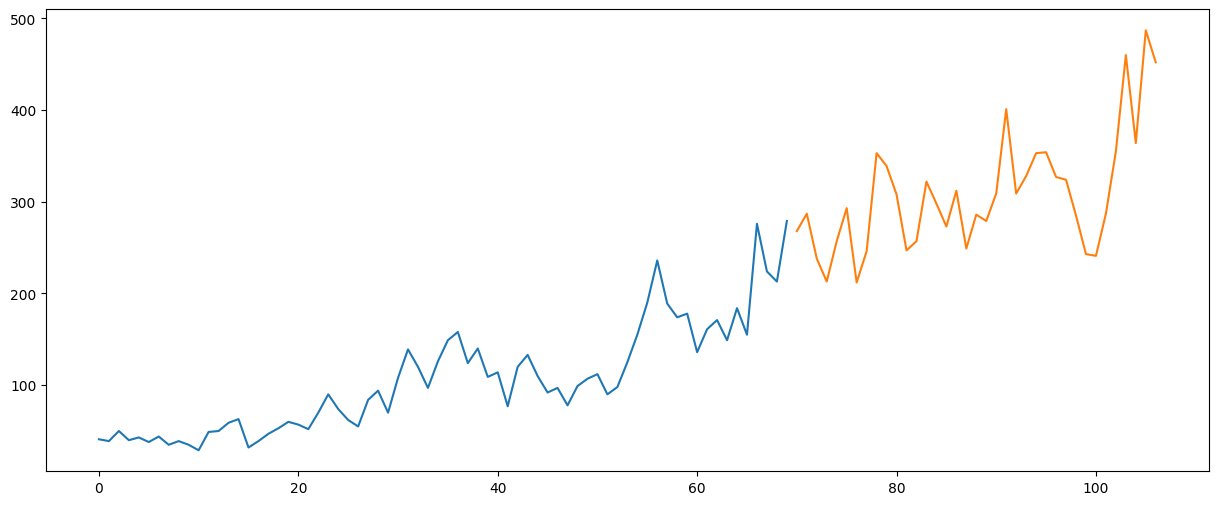

In [46]:
#Finally, a plot is made to show the training dataset and the diverging predictions from the
#expected values from the test dataset.

# plot predictions and expected results
plt.figure(figsize = (15,6))
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])

plt.show()